In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
sns.set()
from datetime import date 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
stock_data = pd.read_csv("all_stocks_5yr.csv")
stock_data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [3]:
def select_columns(data, columns):
    """
    Get a data frame with only specific given columns
    Input(data): dataframe to choose specific columns from
    Input(columns): list of column names to choose
    Output: dataframe with specified columns only
    """
    return data.loc[:, columns]

def rmse(y, yhat):
    """
    Return the rmse given y and yhat
    Input(y): actual value
    Input(yhat): predicted value
    Output: root mean squared error between actual and predicted values
    """
    return np.sqrt(np.mean((y - yhat)**2))

def rmse_score(model, X, y):
    """
    Return the rmse score given the model, X, and y
    Input(model): model used to predict X
    Input (X): predicted values from model
    Input(y): actual value
    Output: root mean squared error score between actual and predicted values from a given model
    """
    return np.sqrt(np.mean((y - model.predict(X)) ** 2))

scaler = StandardScaler()

In [4]:
select_columns(stock_data, ["date", "open"])

,date,open
0,2013-02-08,15.07
1,2013-02-11,14.89
2,2013-02-12,14.45
3,2013-02-13,14.30
4,2013-02-14,14.94
...,...,...
619035,2018-02-01,76.84
619036,2018-02-02,77.53
619037,2018-02-05,76.64
619038,2018-02-06,72.74


In [5]:
stock_data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [6]:
high_and_low = select_columns(stock_data, ["high", "low"])
high_and_low

,high,low
0,15.12,14.63
1,15.01,14.26
2,14.51,14.10
3,14.94,14.25
4,14.96,13.16
...,...,...
619035,78.27,76.69
619036,78.12,76.73
619037,76.92,73.18
619038,74.56,72.13


In [7]:
# x is the date y is the stock --> thats how the prediction should work. 

In [8]:
stock_names = stock_data[["Name"]]
stock_names

,Name
0,AAL
1,AAL
2,AAL
3,AAL
4,AAL
...,...
619035,ZTS
619036,ZTS
619037,ZTS
619038,ZTS


In [9]:
stock_names_dict = stock_names.to_dict(orient = "dict")
stock_names_dict

{'Name': {0: 'AAL',
  1: 'AAL',
  2: 'AAL',
  3: 'AAL',
  4: 'AAL',
  5: 'AAL',
  6: 'AAL',
  7: 'AAL',
  8: 'AAL',
  9: 'AAL',
  10: 'AAL',
  11: 'AAL',
  12: 'AAL',
  13: 'AAL',
  14: 'AAL',
  15: 'AAL',
  16: 'AAL',
  17: 'AAL',
  18: 'AAL',
  19: 'AAL',
  20: 'AAL',
  21: 'AAL',
  22: 'AAL',
  23: 'AAL',
  24: 'AAL',
  25: 'AAL',
  26: 'AAL',
  27: 'AAL',
  28: 'AAL',
  29: 'AAL',
  30: 'AAL',
  31: 'AAL',
  32: 'AAL',
  33: 'AAL',
  34: 'AAL',
  35: 'AAL',
  36: 'AAL',
  37: 'AAL',
  38: 'AAL',
  39: 'AAL',
  40: 'AAL',
  41: 'AAL',
  42: 'AAL',
  43: 'AAL',
  44: 'AAL',
  45: 'AAL',
  46: 'AAL',
  47: 'AAL',
  48: 'AAL',
  49: 'AAL',
  50: 'AAL',
  51: 'AAL',
  52: 'AAL',
  53: 'AAL',
  54: 'AAL',
  55: 'AAL',
  56: 'AAL',
  57: 'AAL',
  58: 'AAL',
  59: 'AAL',
  60: 'AAL',
  61: 'AAL',
  62: 'AAL',
  63: 'AAL',
  64: 'AAL',
  65: 'AAL',
  66: 'AAL',
  67: 'AAL',
  68: 'AAL',
  69: 'AAL',
  70: 'AAL',
  71: 'AAL',
  72: 'AAL',
  73: 'AAL',
  74: 'AAL',
  75: 'AAL',
  76: 'AAL',
 

In [10]:
date_and_name = stock_data[["date", "Name"]]
date_and_name

,date,Name
0,2013-02-08,AAL
1,2013-02-11,AAL
2,2013-02-12,AAL
3,2013-02-13,AAL
4,2013-02-14,AAL
...,...,...
619035,2018-02-01,ZTS
619036,2018-02-02,ZTS
619037,2018-02-05,ZTS
619038,2018-02-06,ZTS


In [11]:
just_names = date_and_name[["Name"]]
just_names_lst = just_names.values.tolist()
arr = np.array(just_names_lst)
flat = arr.flatten()
new_names_lst = list(flat)
new_names_lst
print(len(new_names_lst))
# search_aal = [i for i in new_names_lst if "AAL" in i]
# len(search_aal)

619040


In [12]:
unique_strings = pd.unique(new_names_lst)
print(unique_strings)
print("Number of stocks:", len(unique_strings))

# def generate_dataFrames(stock):
    

['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'ADS' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALLE' 'ALL' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMGN'
 'AMG' 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC'
 'APD' 'APH' 'APTV' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'A' 'BAC' 'BAX' 'BA' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHF'
 'BHGE' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'CAG'
 'CAH' 'CAT' 'CA' 'CBG' 'CBOE' 'CBS' 'CB' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN'
 'CFG' 'CF' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CINF' 'CI' 'CLX' 'CL' 'CMA' 'CMCSA'
 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO' 'COP' 'COST'
 'COTY' 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS'
 'CVX' 'CXO' 'C' 'DAL' 'DE' 'DFS' 'DGX' 'DG' 'DHI' 'DHR' 'DISCA' 'DISCK'
 'DISH' 'DIS' 'DLR' 'DLTR' 'DOV' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN'
 'DWDP' 'DXC' 'D' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'E

In [13]:
date_AAL = stock_data[stock_data["Name"] == "AAL"]
date_high_low_name_AAL = date_AAL[["date", "high", "low", "Name"]]
print(date_high_low_name_AAL)
AAL_list_of_high_vals = date_high_low_name_AAL[["high"]]
AAL_list_of_high_vals_arr = AAL_list_of_high_vals.to_numpy()
flattened_high_vals_AAL_lst = list(AAL_list_of_high_vals_arr.flatten())
print(flattened_high_vals_AAL_lst)
print(len(flattened_high_vals_AAL_lst)) # length should be 1259
# example data structure:
# {"StockName": [high, high, high, high], "StockName2": [high, high, high, high], ..., "StockNameN": [high, high...]}
first_stock = unique_strings[0]

    
    


            date   high    low Name
0     2013-02-08  15.12  14.63  AAL
1     2013-02-11  15.01  14.26  AAL
2     2013-02-12  14.51  14.10  AAL
3     2013-02-13  14.94  14.25  AAL
4     2013-02-14  14.96  13.16  AAL
...          ...    ...    ...  ...
1254  2018-02-01  54.64  53.59  AAL
1255  2018-02-02  53.99  52.03  AAL
1256  2018-02-05  52.39  49.75  AAL
1257  2018-02-06  51.50  48.79  AAL
1258  2018-02-07  51.98  50.89  AAL

[1259 rows x 4 columns]
[15.12, 15.01, 14.51, 14.94, 14.96, 14.61, 14.56, 14.26, 13.95, 13.6, 13.76, 13.42, 13.62, 13.63, 13.95, 14.07, 14.05, 14.68, 14.93, 15.2, 15.15, 15.6, 16.2, 16.36, 16.54, 16.33, 16.85, 17.33, 17.43, 17.29, 17.0, 16.84, 16.77, 17.09, 17.13, 16.5, 15.92, 15.71, 15.79, 15.97, 16.1, 15.98, 16.38, 16.39, 16.39, 16.74, 16.55, 16.54, 16.24, 16.0, 16.49, 16.5, 16.73, 16.73, 16.97, 17.05, 17.17, 16.98, 17.19, 17.11, 17.15, 17.55, 17.86, 17.81, 17.95, 18.3, 18.99, 19.52, 19.7, 19.39, 18.7, 18.43, 18.45, 18.42, 18.72, 18.15, 18.22, 17.9, 17.9, 18.

In [14]:
AAL_dict = {}
counter = 0
for i in range(len(unique_strings)):
    current_stock = unique_strings[i]
    AAL_dict[current_stock] = []
    AAL_dict[current_stock].append([1, 2, 3])

# print(AAL_dict)

In [15]:
def printDataFrame(df, stock):
    """
    df: the dataFrame thats passed in (in this case: stock_data)
    stock: a string which reperesents a stock for any stock in the stock_data dataframe.
    returns the dataFrame associated with a particular stock. 
    """
    just_name = df[["Name"]]
    just_names_lst = just_names.values.tolist()
    arr = np.array(just_names_lst)
    flat = arr.flatten()
    new_names_lst = list(flat)
    stock_names = pd.unique(new_names_lst)
    return df[df["Name"] == stock]
    
printDataFrame(stock_data, unique_strings[0])

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL


In [16]:
printDataFrame(stock_data, unique_strings[1])

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
2513,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
2514,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
2515,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
2516,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [17]:
printDataFrame(stock_data, unique_strings[2])

,date,open,high,low,close,volume,Name
2518,2013-02-08,78.34,79.7200,78.0100,78.90,1298137,AAP
2519,2013-02-11,78.65,78.9100,77.2300,78.39,758016,AAP
2520,2013-02-12,78.39,78.6300,77.5132,78.60,876859,AAP
2521,2013-02-13,78.90,79.1300,77.8500,78.97,1038574,AAP
2522,2013-02-14,78.66,79.7200,78.5850,78.84,1005376,AAP
...,...,...,...,...,...,...,...
3772,2018-02-01,116.24,118.8300,115.8300,117.29,760629,AAP
3773,2018-02-02,115.92,117.1800,113.1250,113.93,1092333,AAP
3774,2018-02-05,113.05,114.9700,109.8100,109.86,1281592,AAP
3775,2018-02-06,108.28,113.1100,106.7450,112.20,1240784,AAP


In [18]:
AAL_df = printDataFrame(stock_data, "AAL")
AAL_high = (AAL_df[["high"]].to_numpy()).flatten()
AAL_high_lst = list(AAL_high)
AAL_high_lst

[15.12,
 15.01,
 14.51,
 14.94,
 14.96,
 14.61,
 14.56,
 14.26,
 13.95,
 13.6,
 13.76,
 13.42,
 13.62,
 13.63,
 13.95,
 14.07,
 14.05,
 14.68,
 14.93,
 15.2,
 15.15,
 15.6,
 16.2,
 16.36,
 16.54,
 16.33,
 16.85,
 17.33,
 17.43,
 17.29,
 17.0,
 16.84,
 16.77,
 17.09,
 17.13,
 16.5,
 15.92,
 15.71,
 15.79,
 15.97,
 16.1,
 15.98,
 16.38,
 16.39,
 16.39,
 16.74,
 16.55,
 16.54,
 16.24,
 16.0,
 16.49,
 16.5,
 16.73,
 16.73,
 16.97,
 17.05,
 17.17,
 16.98,
 17.19,
 17.11,
 17.15,
 17.55,
 17.86,
 17.81,
 17.95,
 18.3,
 18.99,
 19.52,
 19.7,
 19.39,
 18.7,
 18.43,
 18.45,
 18.42,
 18.72,
 18.15,
 18.22,
 17.9,
 17.9,
 18.2,
 17.62,
 17.08,
 17.1,
 17.35,
 17.26,
 17.2,
 17.07,
 17.25,
 17.16,
 17.32,
 17.27,
 17.18,
 16.94,
 16.14,
 16.5,
 16.64,
 16.34,
 16.55,
 17.04,
 16.79,
 16.8,
 17.0,
 17.09,
 17.38,
 17.48,
 17.5,
 17.85,
 17.83,
 18.0,
 18.47,
 18.93,
 18.37,
 18.3,
 18.34,
 18.71,
 18.85,
 19.11,
 19.26,
 19.45,
 19.49,
 19.59,
 19.39,
 19.25,
 19.2,
 18.98,
 19.13,
 19.08,
 18.88,


In [19]:
def getHighVals(df, stock):
    """
    df: dataFrame thats passed in (in this case: stock_data)
    stock: stock thats passed in that exists in the stock_data dataframe.
    """
    just_name = df[["Name"]]
    just_names_lst = just_names.values.tolist()
    arr = np.array(just_names_lst)
    flat = arr.flatten()
    new_names_lst = list(flat)
    stock_names = pd.unique(new_names_lst)
    
    if stock not in stock_names:
        print("stock doesn't exist in the dataframe.")
        
    our_df = printDataFrame(df, stock)
    our_df_high = (our_df[["high"]].to_numpy()).flatten()
    our_df_high_lst = list(our_df_high)
    return our_df_high_lst

getHighVals(stock_data, "AAPL")

[68.4014,
 69.2771,
 68.9114,
 67.6628,
 67.3771,
 67.1656,
 66.1042,
 65.3842,
 64.1671,
 64.5142,
 65.0171,
 64.5056,
 64.6342,
 63.9814,
 62.5971,
 61.1714,
 62.1699,
 62.1785,
 61.7157,
 62.2042,
 62.7157,
 62.6971,
 62.0714,
 62.0914,
 63.4614,
 65.3514,
 65.8528,
 65.3756,
 65.4256,
 66.0142,
 67.1356,
 66.5485,
 65.2571,
 64.5455,
 63.3854,
 62.5914,
 62.4685,
 62.1428,
 60.7071,
 61.0714,
 61.2142,
 62.4371,
 62.5699,
 62.0214,
 61.1271,
 60.9442,
 60.0857,
 57.9699,
 57.0857,
 57.4571,
 58.3401,
 59.3214,
 59.1342,
 59.8241,
 61.9452,
 63.6071,
 63.5614,
 64.0842,
 64.7471,
 66.0285,
 66.5356,
 66.4814,
 66.1428,
 65.6728,
 65.4142,
 65.0285,
 62.9999,
 62.5499,
 62.8699,
 63.6857,
 63.6399,
 64.0499,
 63.7371,
 63.6657,
 64.4442,
 63.9285,
 64.9285,
 65.2999,
 64.6228,
 64.9185,
 64.3885,
 63.8571,
 63.3199,
 64.1541,
 63.2514,
 63.0357,
 62.4485,
 62.3271,
 62.2428,
 62.1285,
 61.6657,
 60.8542,
 59.9999,
 58.3799,
 58.2557,
 57.8271,
 57.3414,
 57.1814,
 58.8957,
 60.2328,


In [20]:
stock_data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [21]:
unique_strings

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [22]:
num_rows = list(stock_data.shape)[0]
print(getHighVals(stock_data, "WYN"))
        

[60.095, 60.19, 59.87, 59.87, 59.18, 59.9, 59.4, 58.65, 57.37, 58.39, 58.89, 58.37, 59.44, 60.51, 61.39, 60.74, 61.35, 61.6, 62.12, 63.58, 63.46, 62.79, 62.97, 63.18, 63.23, 62.69, 62.92, 63.0, 62.47, 62.525, 63.21, 63.49, 64.14, 64.8, 64.78, 64.96, 64.99, 63.7, 62.15, 63.59, 63.94, 64.2, 64.89, 65.3, 64.98, 64.12, 63.64, 63.6, 63.71, 63.73, 64.88, 65.0, 63.25, 62.99, 61.49, 60.99, 60.4, 61.75, 62.85, 64.0, 64.48, 64.36, 64.04, 64.7399, 65.0, 64.34, 63.54, 63.1, 61.96, 61.3, 61.49, 62.07, 61.34, 60.6, 61.555, 61.23, 60.27, 59.21, 58.38, 58.95, 58.05, 57.74, 59.02, 58.84, 58.19, 58.69, 59.34, 59.49, 59.50899999999999, 60.035, 59.92, 57.9, 56.255, 55.19, 56.48, 57.16, 57.76, 57.83, 57.83, 57.71, 57.39, 58.95, 59.63, 59.52, 59.65, 60.6, 60.42, 60.34, 60.08, 60.92, 61.19, 60.23, 60.51, 60.62, 62.5861, 61.55, 61.78, 61.96, 61.99, 62.73, 63.855, 64.18, 63.63, 62.99, 61.865, 62.0, 61.53, 60.75, 60.555, 60.5, 60.05, 59.68, 59.8, 60.08, 59.66, 61.07, 60.54, 61.5, 60.27, 58.81, 59.86, 59.6710000

In [23]:
# our_dict = {}
# counter = 0
# for stock in unique_strings:
#     current_stock = stock[counter]
#     our_dict[current_stock] = []
#     for i in range(len(unique_strings)):
#         our_dict[current_stock].append(getHighVals(stock_data, unique_strings[i]))
# print(our_dict)
        

In [24]:
getHighVals(stock_data, unique_strings[31])

[2.6,
 2.7,
 2.78,
 2.83,
 2.75,
 2.79,
 2.82,
 2.84,
 2.69,
 2.67,
 2.65,
 2.545,
 2.55,
 2.57,
 2.51,
 2.45,
 2.47,
 2.46,
 2.57,
 2.6409,
 2.6038,
 2.63,
 2.63,
 2.63,
 2.62,
 2.68,
 2.7,
 2.75,
 2.75,
 2.67,
 2.6,
 2.54,
 2.6182,
 2.57,
 2.57,
 2.45,
 2.41,
 2.37,
 2.31,
 2.61,
 2.63,
 2.66,
 2.57,
 2.5,
 2.465,
 2.44,
 2.47,
 2.56,
 2.5,
 2.51,
 2.55,
 2.62,
 2.72,
 2.68,
 2.7,
 2.82,
 3.28,
 3.48,
 3.8,
 3.75,
 3.6689999999999996,
 3.85,
 3.99,
 3.97,
 4.22,
 4.32,
 4.42,
 3.94,
 4.095,
 4.2,
 4.2,
 4.1,
 4.05,
 4.06,
 4.15,
 4.05,
 4.06,
 4.11,
 4.03,
 4.04,
 4.03,
 3.94,
 3.99,
 4.08,
 4.11,
 4.03,
 3.96,
 4.04,
 4.14,
 4.11,
 4.18,
 4.03,
 4.04,
 4.09,
 4.15,
 4.21,
 4.19,
 4.12,
 4.13,
 4.12,
 4.07,
 4.1,
 4.085,
 4.08,
 4.06,
 4.45,
 4.5,
 4.4,
 4.49,
 4.45,
 4.65,
 4.08,
 4.01,
 3.88,
 3.75,
 3.74,
 3.83,
 3.89,
 3.85,
 3.9,
 3.87,
 3.84,
 3.84,
 3.82,
 3.7,
 3.73,
 3.7,
 3.72,
 3.71,
 3.83,
 3.84,
 3.71,
 3.68,
 3.69,
 3.68,
 3.65,
 3.74,
 3.66,
 3.55,
 3.49,
 3.48,
 3.41,

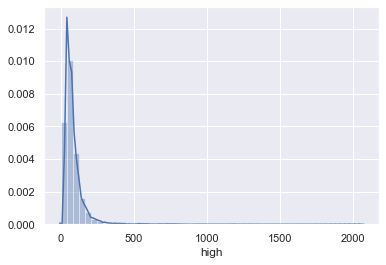

In [25]:
#sp.interpolate.interp1d()
dates = stock_data[["date"]].to_numpy()
first_ten_dates = list(dates[0:10])

first_ten_apple_highs = getHighVals(stock_data, "AAPL")[0:10]
first_ten_apple_highs

sns.distplot(stock_data["high"].fillna(0))

In [34]:
apple_df = printDataFrame(stock_data, "AAPL")
apple_dates = apple_df[["date"]].to_numpy().flatten()
apple_dates

array(['2013-02-08', '2013-02-11', '2013-02-12', ..., '2018-02-05',
       '2018-02-06', '2018-02-07'], dtype=object)

In [39]:
lol = sp.interpolate.interp1d(getHighVals(stock_data, "GOOGL"), getHighVals(stock_data, "AAPL"), kind = "nearest", assume_sorted = False)
y_pred = lol(getHighVals(stock_data, "GOOGL"))
print("y predicted:", y_pred)
y_actual = getHighVals(stock_data, "GOOGL")
print("y actual:", y_actual)

y predicted: [ 68.4014  69.2771  68.9114 ... 163.88   163.72   163.4   ]
y actual: [393.7283, 391.8915, 394.344, 393.0677, 394.7644, 397.0266, 403.9035, 404.8895, 403.1277, 401.0256, 404.6092, 398.3729, 402.7774, 403.8985, 403.9736, 411.8314, 420.495, 422.42199999999997, 418.7283, 417.8774, 420.2699, 416.3609, 415.7603, 413.9085, 410.5602, 406.7864, 410.0346, 409.1638, 408.8671, 408.0276, 410.0246, 407.4069, 403.9035, 403.0877, 401.5261, 407.8224, 407.5071, 403.2779, 393.8885, 390.1648, 392.2669, 396.5712, 396.9466, 396.4471, 398.8985, 398.398, 395.8179, 393.2929, 402.1217, 402.381, 408.1578, 409.409, 408.6432, 404.2739, 411.7613, 414.2338, 412.7724, 417.6923, 423.8234, 431.3559, 432.3669, 437.3769, 440.2698, 440.7103, 441.6762, 444.7893, 458.6482, 460.4499, 457.2012, 460.7603, 456.2858, 455.1097, 445.425, 439.8494, 446.5161, 439.434, 439.8895, 438.9385, 437.4219, 435.7303, 435.1597, 433.5982, 440.44, 445.9455, 443.9435, 443.44300000000004, 440.2698, 442.7923, 445.1597, 450.9505, 455.8